In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

from scipy.stats import chi2_contingency
import scipy.stats as stats

# classification model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [32]:
smote_data = pd.read_csv(r'./../data/oversampled_data.csv')

In [33]:
y = smote_data.iloc[:,-1]
y = y.map({'No':0, 'Yes':1})

In [34]:
X = smote_data.drop('offer_accepted', axis=1)

In [35]:
X.credit_cards_held.value_counts()

credit_cards_held
 0.121161    11900
-1.133443     9410
 1.375766     4704
 2.630370      602
 0.961990        1
             ...  
-0.514003        1
 2.085210        1
-0.055349        1
 0.937470        1
-0.742960        1
Name: count, Length: 7298, dtype: int64

In [36]:
def continous_distribution(df):
    a = math.ceil(df.shape[1]/2)  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize = (14,5*a))
    plt.suptitle("Distribution of Numerical Variables", fontsize = 14, y=1)

    for i in df:
        plt.subplot(a, b, c)
        plt.title('{}'.format(i, a, b, c))
        plt.xlabel(i)
        fig = sns.distplot(df[i])
        fig.axvline(x = np.mean(df[i]), color="red")
        fig.axvline(x = np.median(df[i]), color="green")
        c = c + 1
    
    plt.tight_layout()
    plt.show()

/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_25073/2093159593.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i])
/var/folders/8z/6dxd_gws0p1gkky66vd1t2xh0000gn/T/ipykernel_25073/2093159593.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(df[i])
/var/folders

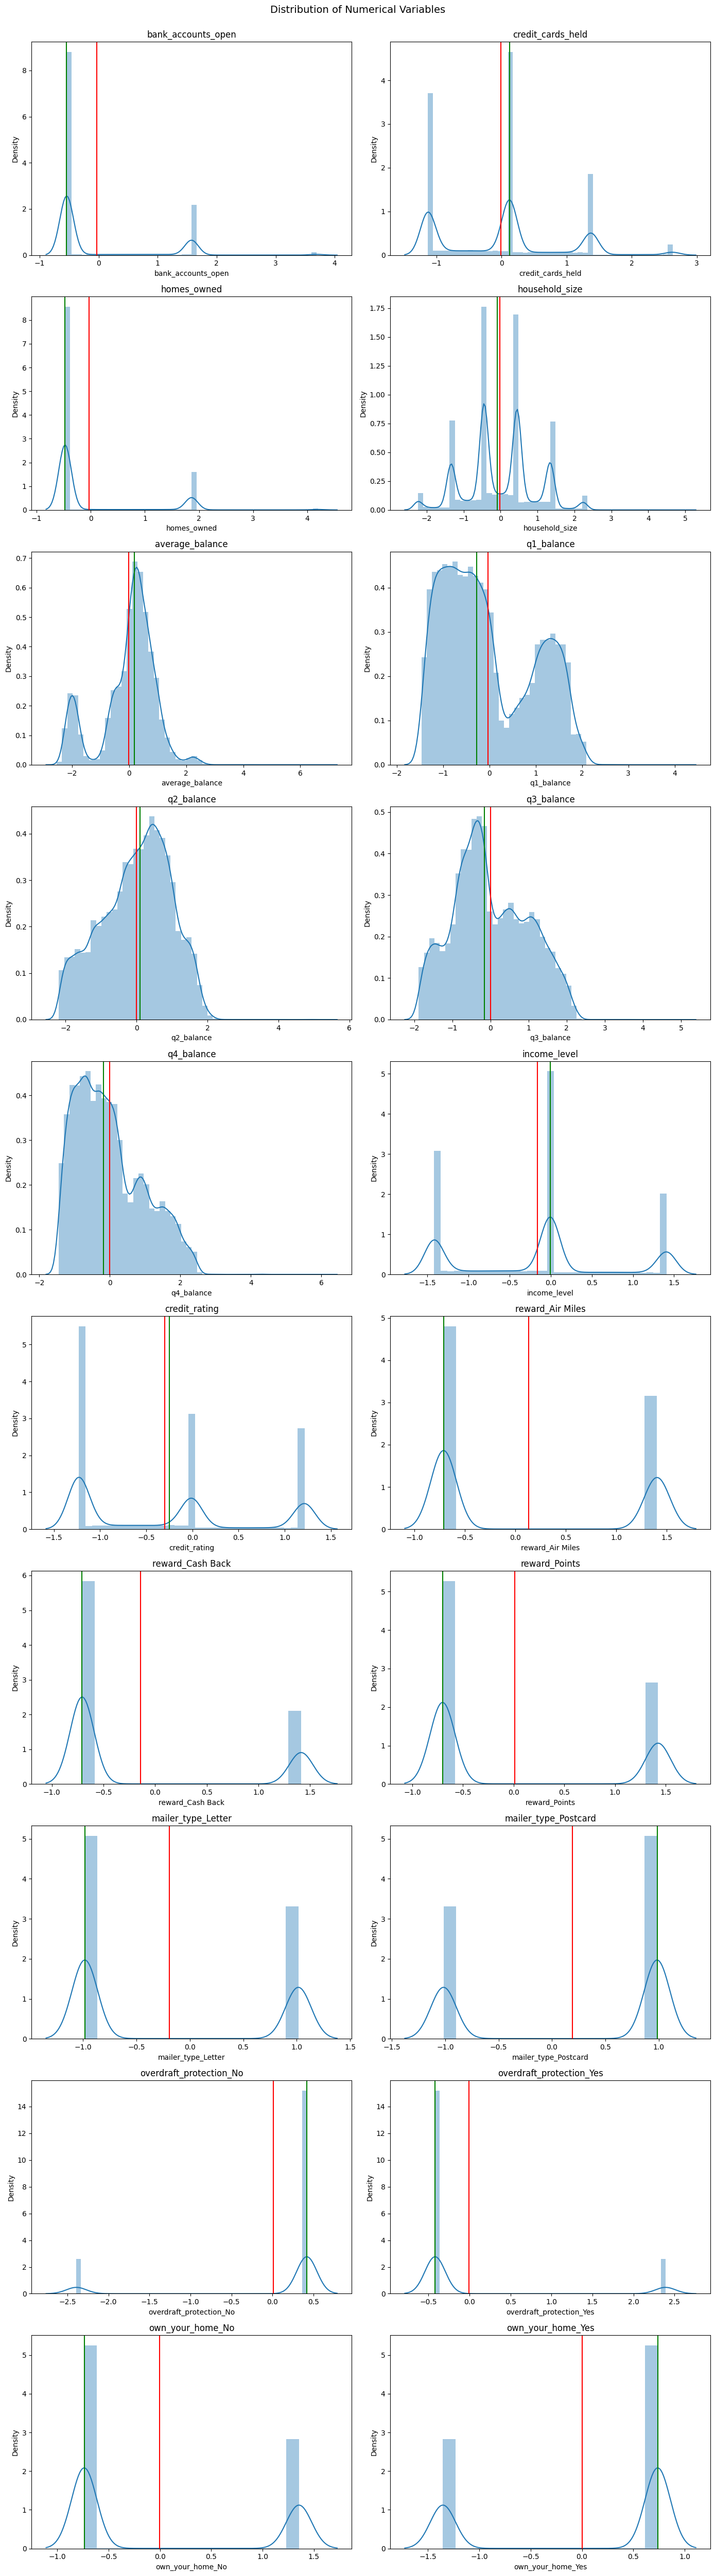

In [37]:
continous_distribution(X)

In [38]:
def check_outliers(df):
    a = math.ceil(df.shape[1]/2)  # number of rows
    b = 2  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize = (14,15))
    plt.suptitle("Plotting Outliers", fontsize = 14, y=1)

    for i in df:
        plt.subplot(a, b, c)
        plt.title('{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxenplot(x = df[i])
        c = c + 1
    
    plt.tight_layout()
    plt.show()

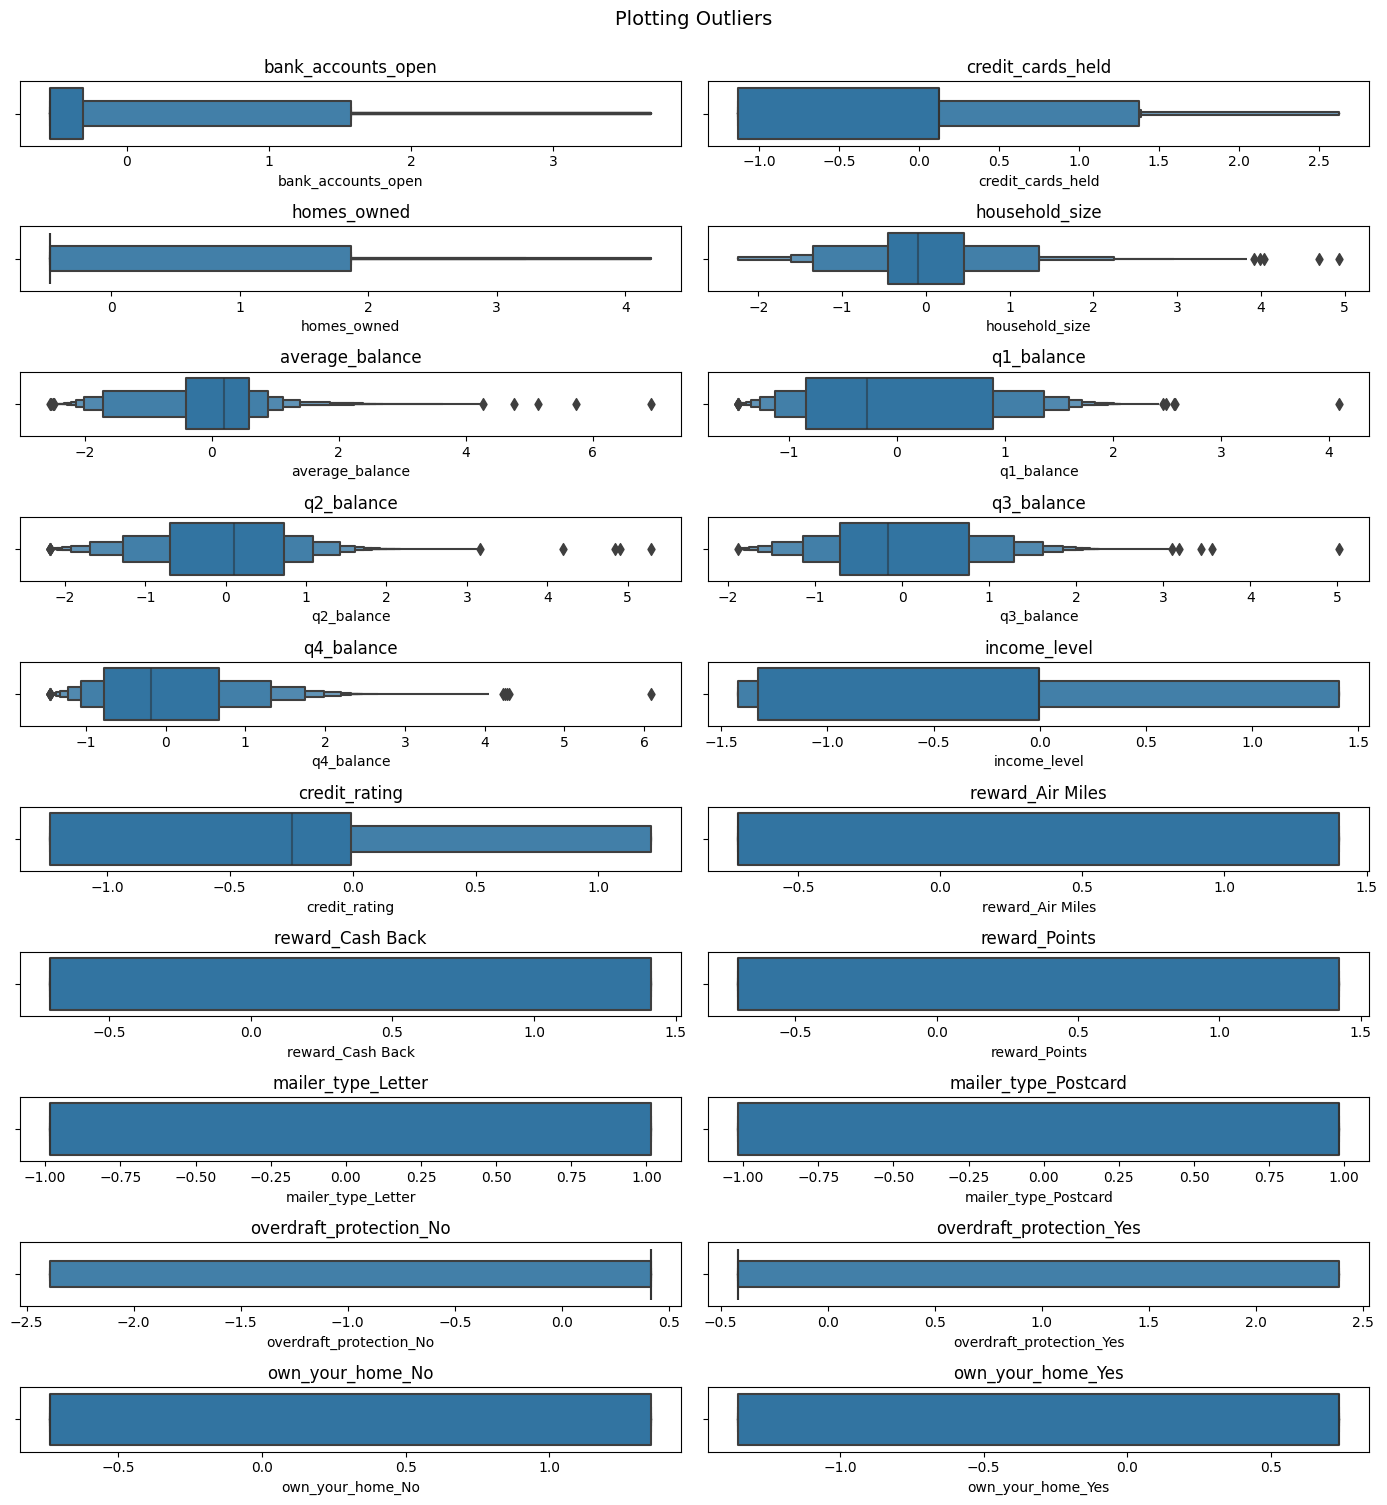

In [39]:
check_outliers(X)

In [40]:
X1 = X.copy()

In [41]:
X1.columns

Index(['bank_accounts_open', 'credit_cards_held', 'homes_owned',
       'household_size', 'average_balance', 'q1_balance', 'q2_balance',
       'q3_balance', 'q4_balance', 'income_level', 'credit_rating',
       'reward_Air Miles', 'reward_Cash Back', 'reward_Points',
       'mailer_type_Letter', 'mailer_type_Postcard', 'overdraft_protection_No',
       'overdraft_protection_Yes', 'own_your_home_No', 'own_your_home_Yes'],
      dtype='object')

In [42]:
X_keep = ['credit_rating', 'income_level', 'credit_cards_held', 'household_size', 'reward_Cash Back']

In [43]:
X1 = X1[X_keep]

In [44]:
X1

,credit_rating,income_level,credit_cards_held,household_size,reward_Cash Back
0,1.215460,1.410295,0.121161,0.449452,-0.707372
1,-0.007894,-0.005039,0.121161,1.346760,-0.707372
2,-0.007894,1.410295,0.121161,-1.345162,-0.707372
3,1.215460,-0.005039,-1.133443,0.449452,-0.707372
4,-0.007894,-0.005039,0.121161,2.244067,-0.707372
...,...,...,...,...,...
33905,0.230839,-1.144176,0.365992,1.171654,-0.707372
33906,-0.007894,-1.420373,0.121161,-1.339703,-0.707372
33907,-0.850492,-0.445548,-0.742960,-1.345162,1.413683
33908,-0.337504,0.376295,0.121161,0.207690,-0.707372


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=100)

## RandomForestClassifier

In [46]:
rf = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)
rf.fit(X_train,y_train)
print('Training Accuracy Score: {:.2f} \nOOB Score: {:.2f} \nValidation Accuracy Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))

rf_pred = rf.predict(X_test)

Training Accuracy Score: 0.94 
OOB Score: 0.93 
Validation Accuracy Score: 0.93


In [47]:
def metrics_class(actual, predicted):
    kappa = cohen_kappa_score(actual, predicted)
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    auc_score = roc_auc_score(actual, predicted)
    
    index = ['Cohen Kappa Score', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC Score']
    metrics = pd.Series([kappa, accuracy, precision, recall, f1, auc_score], index=index)
    return metrics.round(2)

In [48]:
metrics_class(y_test, rf_pred)

Cohen Kappa Score    0.87
Accuracy             0.93
Precision            1.00
Recall               0.87
F1                   0.93
AUC Score            0.93
dtype: float64

In [49]:
def plot_cm(actual, prediction):
    cm = confusion_matrix(actual, prediction)
    # Visualize confusion matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Set2_r', fmt='g', ax=ax)

    # Set axis labels and title
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.tight_layout()



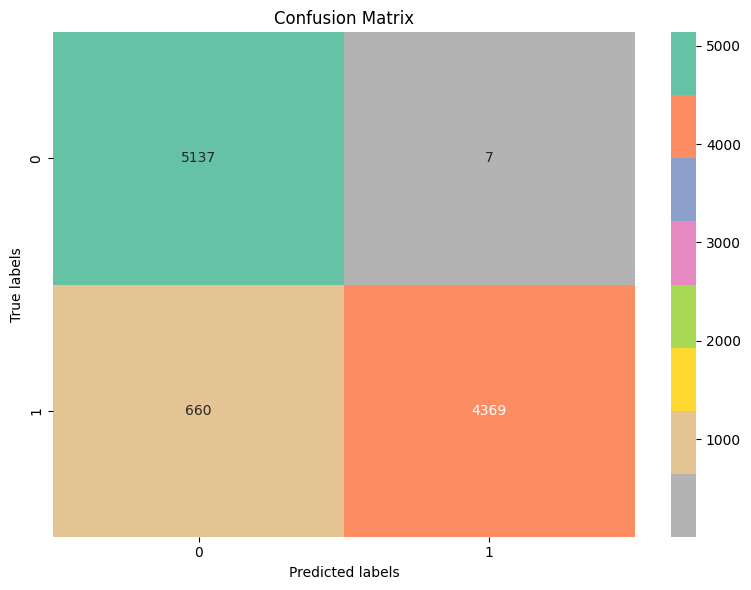

In [58]:
plot_cm(y_test, rf_pred)

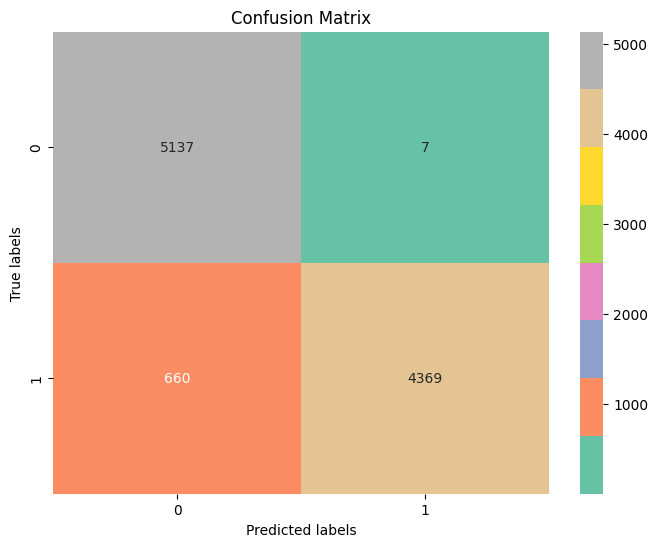

In [51]:
# Compute confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Visualize confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Set2', fmt='g', ax=ax)

# Set axis labels
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Set title
ax.set_title('Confusion Matrix')

# Show plot
plt.show()


In [52]:
X2 = X.drop(columns=(X_keep))

In [53]:
X2

,bank_accounts_open,homes_owned,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,reward_Air Miles,reward_Points,mailer_type_Letter,mailer_type_Postcard,overdraft_protection_No,overdraft_protection_Yes,own_your_home_No,own_your_home_Yes
0,-0.541352,-0.476212,0.628724,1.223349,-0.267589,0.095704,0.343147,1.404533,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
1,-0.541352,1.863330,-2.264609,-1.405430,-1.953241,-1.741902,-0.794628,1.404533,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
2,1.575537,-0.476212,-1.895627,-0.876449,-1.415407,-1.620841,-1.016458,1.404533,-0.701980,-0.983886,0.983886,0.418213,-0.418213,-0.738147,0.738147
3,1.575537,-0.476212,0.795015,1.076589,1.662932,0.139070,-0.699813,1.404533,-0.701980,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744
4,-0.541352,-0.476212,0.772177,1.982953,0.781845,-0.108474,-0.796417,1.404533,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33905,1.575537,1.406778,-2.006040,-1.383443,-1.399945,-1.216592,-1.143719,1.404533,-0.701980,-0.983886,0.983886,0.418213,-0.418213,1.354744,-1.354744
33906,-0.541352,-0.476212,0.509354,-0.090918,1.061438,0.733175,-0.216821,1.404533,-0.701980,1.016378,-1.016378,0.418213,-0.418213,-0.738147,0.738147
33907,-0.541352,-0.476212,0.100980,1.500388,0.608086,-0.670130,-1.245289,-0.711980,-0.701980,-0.983886,0.983886,-2.391127,2.391127,0.703352,-0.703352
33908,-0.541352,-0.476212,0.117587,0.101837,0.098037,-0.168242,0.268133,-0.711980,1.424543,1.016378,-1.016378,0.418213,-0.418213,1.354744,-1.354744


In [54]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=100)

In [55]:
rf.fit(X2_train,y2_train)
print('Training Accuracy Score: {:.2f} \nOOB Score: {:.2f} \nValidation Accuracy Score: {:.2f}'.format(rf.score(X2_train, y2_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X2_test, y2_test)))

rf2_pred = rf.predict(X2_test)

Training Accuracy Score: 1.00 
OOB Score: 0.90 
Validation Accuracy Score: 0.90


In [56]:
metrics_class(y2_test, rf2_pred)

Cohen Kappa Score    0.80
Accuracy             0.90
Precision            0.88
Recall               0.92
F1                   0.90
AUC Score            0.90
dtype: float64

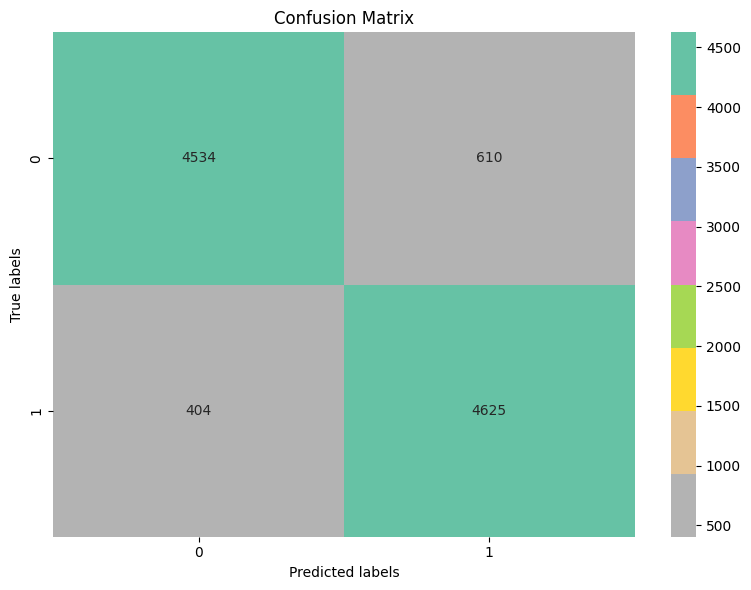

In [57]:
plot_cm(y2_test, rf2_pred)